In [1]:
# modules

import numpy as np
import matplotlib.pyplot as plt
from math import floor as flr
from matplotlib.animation import FuncAnimation as create_anim

# Task 1 - one dimensional Gray-Scott system

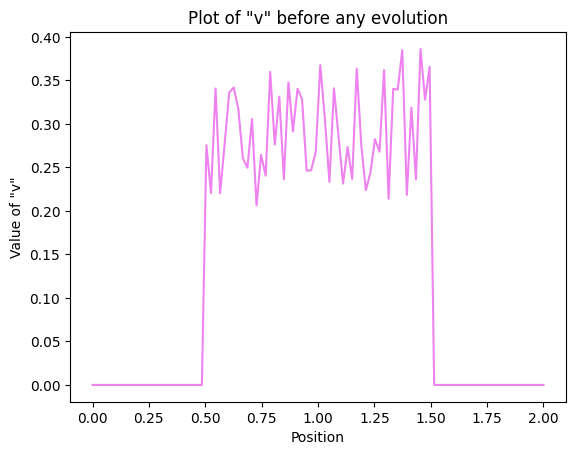

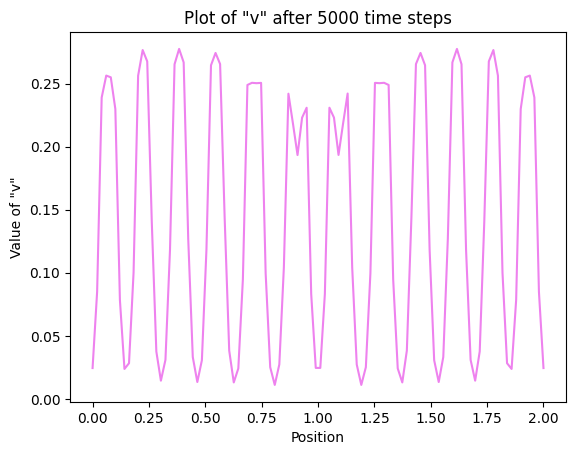

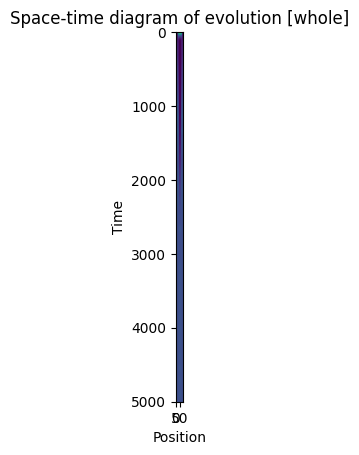

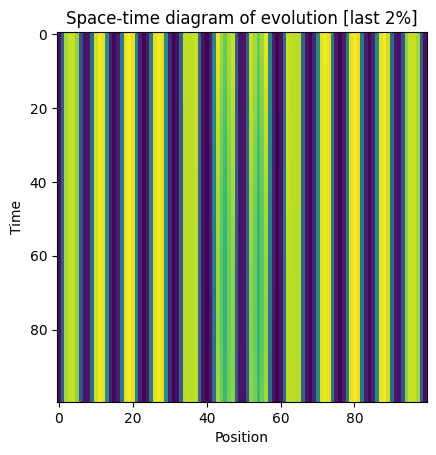

In [2]:
# initialize space

N = 100

u_line = np.ones(N)
v_line = np.zeros(N)
X = np.linspace(0, 2, 100)

for i in range(flr(0.25*N), flr(0.75*N)):
    u_line[i] = np.random.rand()*0.2 + 0.4
    v_line[i] = np.random.rand()*0.2 + 0.2

plt.plot(X, v_line, color = "violet")
plt.xlabel("Position")
plt.ylabel("Value of \"v\"")
plt.title("Plot of \"v\" before any evolution")
plt.show()

# initialize parameters

dx = 0.02
dt = 1
D_u = 2e-5
D_v = 1e-5
F = 0.025
k = 0.055

# derivative operators that modify whole space at once

def space_deriv(space):
    right = np.roll(space, shift = 1)
    left = np.roll(space, shift = -1)
    return (right - left) / (2*dx)

def space_laplat(space):
    return space_deriv(space_deriv(space))

def alternative_laplat(space):
    return (np.roll(space, 1) - 2* space + np.roll(space, -1)) / (dx**2)

# time evolution function

def u_time_step(u_space, v_space):
    velo = D_u * alternative_laplat(u_space) - u_space*v_space*v_space + F * (np.ones(len(u_space)) - u_space)
    return velo * dt

def v_time_step(u_space, v_space):
    velo =  D_v * alternative_laplat(v_space) + u_space*v_space*v_space - (F + k) * v_space
    return velo * dt

# evolution in time

space_time = v_line.copy()

total_time = 5000

for t in range(total_time):

    u = u_line.copy()
    v = v_line.copy()
    
    u_line = u + u_time_step(u, v)
    v_line = v + v_time_step(u, v)

    space_time = np.row_stack([space_time, v_line])

# plot results

plt.plot(X, v_line, color = "violet")
plt.xlabel("Position")
plt.ylabel("Value of \"v\"")
plt.title("Plot of \"v\" after {} time steps".format(total_time))
plt.show()

plt.imshow(space_time)
plt.xlabel("Position")
plt.ylabel("Time")
plt.title("Space-time diagram of evolution [whole]")
plt.show()

plt.imshow(space_time[4900:5000, 0:100])
plt.xlabel("Position")
plt.ylabel("Time")
plt.title("Space-time diagram of evolution [last 2%]")
plt.show()

# Task 2 - two dimensional Gray-Scott system

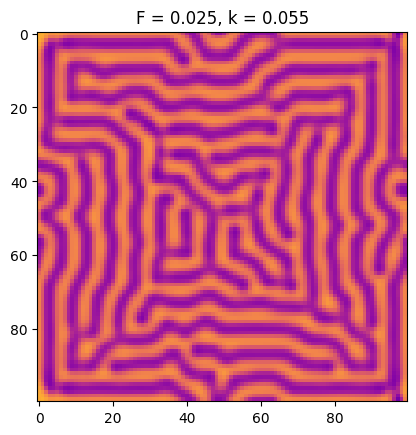

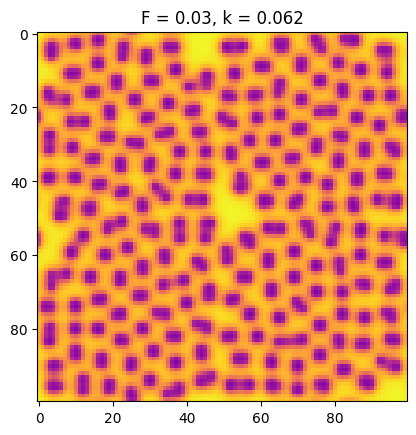

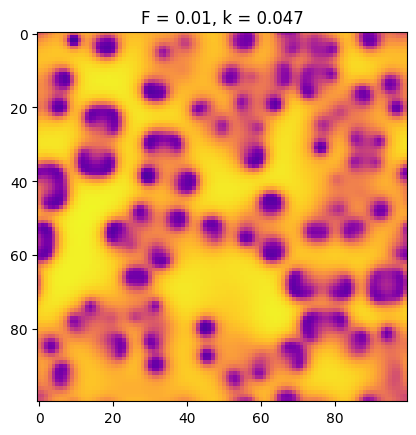

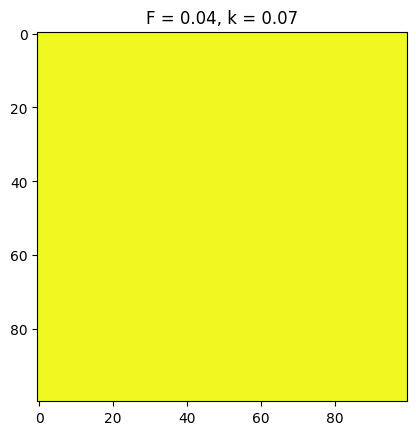

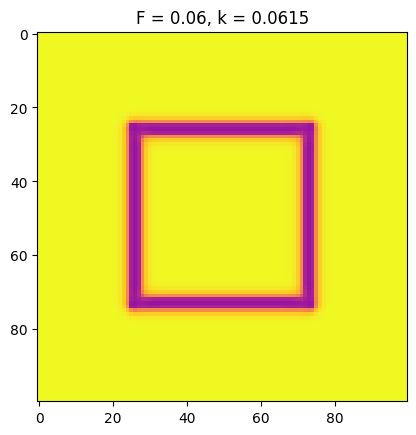

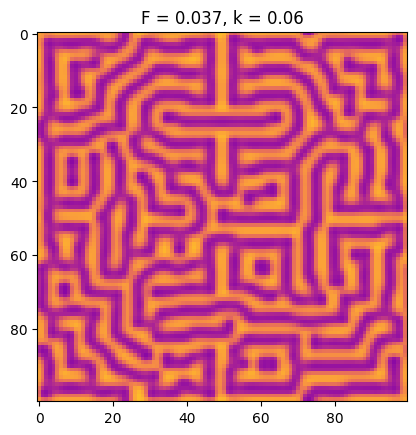

In [3]:
# let's define derivative operators

dx = 0.02

def x_deriv(grid):
    right = np.roll(grid, shift = 1, axis = 0)
    left = np.roll(grid, shift = -1, axis = 0)
    return (right - left) / (2*dx)

def y_deriv(grid):
    up = np.roll(grid, shift = 1, axis = 1)
    down = np.roll(grid, shift = -1, axis = 1)
    return (up - down) / (2*dx)

def laplatian_2d(grid):
    return x_deriv(x_deriv(grid)) + y_deriv(y_deriv(grid))

def alternative_laplatian_2d(grid):
    x = (np.roll(grid, 1, axis = 0) - 2*grid + np.roll(grid, -1, axis = 0)) / (dx**2)
    y = (np.roll(grid, 1, axis = 1) - 2*grid + np.roll(grid, -1, axis = 1)) / (dx**2)
    return x + y

# and also time step function

D_u = 2e-5
D_v = 1e-5
dt = 1

def u_step(u, v, F):
    velo = D_u * alternative_laplatian_2d(u) - u*v*v + F*(np.ones(u.shape) - u)
    return dt*velo 

def v_step(u, v, F, k):
    velo = D_v * alternative_laplatian_2d(v) + u*v*v - (F + k)*v
    return dt*velo

# so calculate how will system look after a while

param_list = [[0.025, 0.055], [0.03, 0.062], [0.01, 0.047], [0.04, 0.07], [0.06, 0.0615], [0.037, 0.06]]

total_time = 5000

for F, k in param_list:

    # initialization

    N = 100

    u_grid = np.ones([N, N])
    v_grid = np.zeros([N, N])

    for row in range(flr(0.25*N), flr(0.75*N)):
        for col in range(flr(0.25*N), flr(0.75*N)):
            u_grid[row, col] = np.random.rand() * 0.2 + 0.4
            v_grid[row, col] = np.random.rand() * 0.2 + 0.2

    # time loop

    for t in range(total_time):

        u = u_grid.copy()
        v = v_grid.copy()
        
        u_grid = u + u_step(u, v, F)
        v_grid = v + v_step(u, v, F, k)
    
    # plotting

    plt.imshow(u_grid, cmap = "plasma")
    plt.title("F = {}, k = {}".format(F, k))
    plt.clim(0, 1)
    plt.show()

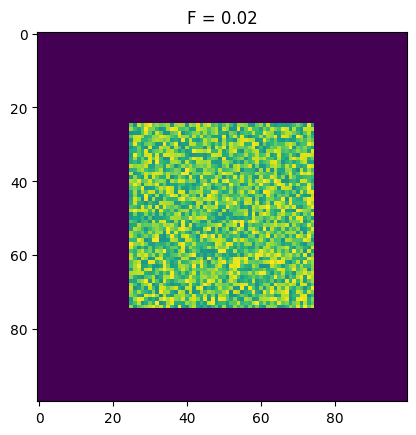

In [7]:
# the evolution functions from previous chunk

def alternative_laplatian_2d(grid):
    x = (np.roll(grid, 1, axis = 0) - 2*grid + np.roll(grid, -1, axis = 0)) / (dx**2)
    y = (np.roll(grid, 1, axis = 1) - 2*grid + np.roll(grid, -1, axis = 1)) / (dx**2)
    return x + y

def u_step(u, v, F):
    velo = D_u * alternative_laplatian_2d(u) - u*v*v + F*(np.ones(u.shape) - u)
    return dt*velo 

def v_step(u, v, F, k):
    velo = D_v * alternative_laplatian_2d(v) + u*v*v - (F + k)*v
    return dt*velo

# initiation

D_u = 2e-5
D_v = 1e-5
dt = 1
dx = 0.02

u_grid = np.ones([N, N])
v_grid = np.zeros([N, N])

for row in range(flr(0.25*N), flr(0.75*N)):
    for col in range(flr(0.25*N), flr(0.75*N)):
        u_grid[row, col] = np.random.rand() * 0.2 + 0.4
        v_grid[row, col] = np.random.rand() * 0.2 + 0.2

# let's prepare simulation

total_time = 40000
k = 0.062
F_line = np.linspace(0.02, 0.045, total_time)

frames = []
print_time = 500

fig = plt.figure()
ax = plt.axes()
im = ax.imshow(v_grid)
ax.set_title("F = {}".format(F_line[0]))

def init():
    im.set_data(v_grid)
    return [im]

def animate(i):
    im = ax.imshow(frames[i])
    ax.set_title("F = {}".format(round(F_line[i*print_time], 4)))
    return [im]

# time loop

for t in range(total_time):
    
    u = u_grid.copy()
    v = v_grid.copy()
    
    u_grid = u + u_step(u, v, F_line[t])
    v_grid = v + v_step(u, v, F_line[t], k)
    
    # save frames

    if t % print_time == 0:
        frames.append(v)

# create and save animation to file

animation = create_anim(fig, animate, frames= flr(total_time / print_time))
animation.save("Scan4.gif")